<a href="https://colab.research.google.com/github/tux2won/self_study/blob/main/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2장 – 머신러닝 프로젝트 처음부터 끝까지**

*머신러닝 부동산 회사에 오신 것을 환영합니다! 여러분이 할 작업은 캘리포니아 지역 주택의 여러 특성을 사용해 중간 가격을 예측하는 것입니다.*

*이 노트북은 2장의 모든 샘플 코드와 연습 문제 정답을 담고 있습니다.*

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

# 설정

먼저 몇 개의 모듈을 임포트합니다. 맷플롯립 그래프를 인라인으로 출력하도록 만들고 그림을 저장하는 함수를 준비합니다. 또한 파이썬 버전이 3.5 이상인지 확인합니다(파이썬 2.x에서도 동작하지만 곧 지원이 중단되므로 파이썬 3을 사용하는 것이 좋습니다). 사이킷런 버전이 0.20 이상인지도 확인합니다.

In [ ]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 내가 추가
import seaborn as sns

# 깔금한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 데이터 가져오기

## 데이터 다운로드하기

In [ ]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing") # 결과: datasets/housing
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# 그냥 다운로드하고 압축해제하기 위한 코드임
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
fetch_housing_data()

# 여기까지 하고 나면 옆 폴더 파일에 데이터셋 예쁘게 다운로드 완료

In [ ]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    print(csv_path)
    return pd.read_csv(csv_path)

# os.path: OS에 따라 경로 구분자(/ 또는 \)가 다르기 때문에, 운영 체제에 맞는 경로 처리를 자동으로 수행
# join: 파일 경로를 결합하는 함수

## 데이터 구조 훑어 보기

In [ ]:
housing = load_housing_data()
housing.head()

datasets/housing/housing.csv


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

target feature

median_house_value = 특정 지역 내 주택 가격의 중앙값

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


info() 분석

4.total_bedrooms 컬럼만 행 개수가 20433개 -> 무언가 결측치 처리를 해줘야할 것으로 짐작

9.ocean_proximity만 데이터 타입이 다름 -> 수치화 필요할 것으로 짐작


In [ ]:
housing["ocean_proximity"].value_counts()

# value_counts(): 열에 어떤 값들이 있는 지 표현해 줌(확인하기 용이)
# distinct와 유사한 개념
# 바다(해안가)와 얼마나 가까운지 관계성에 대한 문자열

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [ ]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  16512.000000  16512.000000        16512.000000  16512.000000   
mean    -119.575635     35.639314           28.653404   2622.539789   
std        2.001828      2.137963           12.574819   2138.417080   
min     -124.350000     32.540000            1.000000      6.000000   
25%     -121.800000     33.940000           18.000000   1443.000000   
50%     -118.510000     34.260000           29.000000   2119.000000   
75%     -118.010000     37.720000           37.000000   3141.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    16354.000000  16512.000000  16512.000000   16512.000000   
mean       534.914639   1419.687379    497.011810       3.875884   
std        412.665649   1115.663036    375.696156       1.904931   
min          2.000000      3.000000      2.000000       0.499900   
25%        295.000000    784.000000    279.000000       2.566950   
50%        433.000000   1164.000000    408.000000       3.541550   
75%        644.000000   1719.000000    602.000000       4.745325   
max       6210.000000  35682.000000   5358.000000      15.000100   

       median_house_value  
count        16512.000000  
mean        207005.322372  
std         115701.297250  
min          14999.000000  
25%         119800.000000  
50%         179500.000000  
75%         263900.000000  
max         500001.000000

std: 표준편차

그림 저장: attribute_histogram_plots


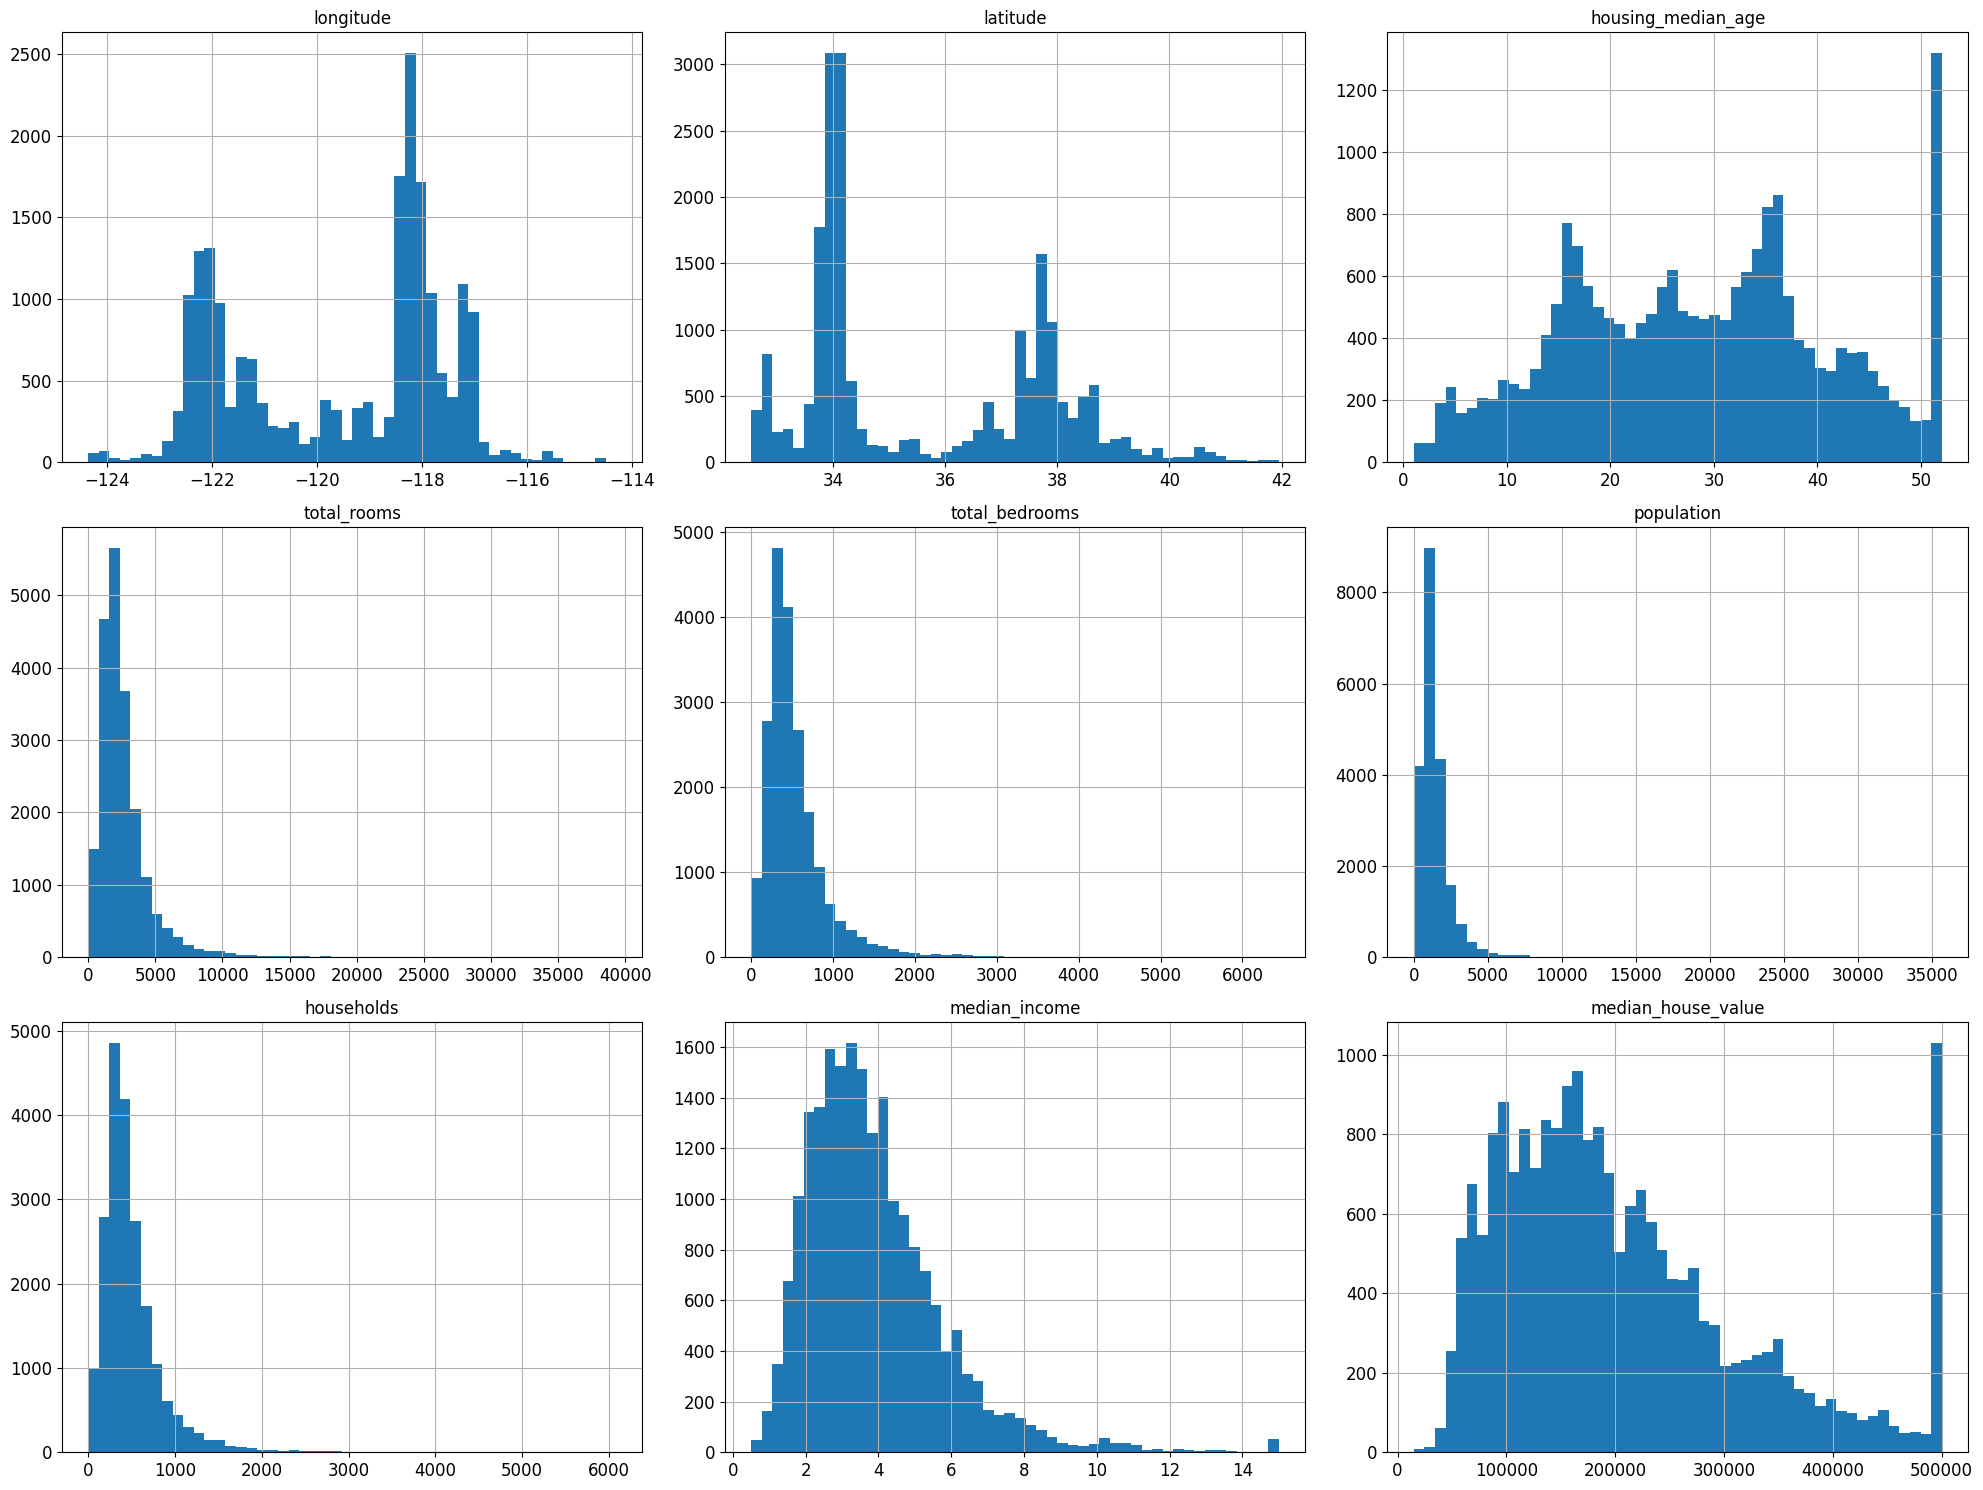

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
# hist:
# 50개의 구간으로 나누어서
# 사이즈는 그냥 가로:세로 사이즈 비율

save_fig("attribute_histogram_plots")
plt.show()

hist 함수는 데이터를 히스토그램(histogram) 형태로 시각화하는 데 사용됩니다. 히스토그램은 데이터 분포를 나타내는 그래프이며, 데이터를 여러 **구간(bin)**으로 나누고 각 구간에 속하는 데이터의 개수를 막대 그래프로 보여줍니다.

주요 기능:
1. 데이터의 분포 시각화:

히스토그램은 데이터의 분포 형태(정규분포, 치우침 등)를 확인하는 데 유용합니다.
예: 학생들의 시험 점수 분포, 주택 가격 분포 등.

2. 구간(bin)의 설정:

데이터를 나눌 구간(막대) 개수를 지정하여 더 세밀하거나, 덜 세밀한 분포를 볼 수 있습니다.
기본값은 10개의 구간.

3. 밀도(density) 표시:

density=True 옵션을 사용하면 데이터의 빈도수 대신 밀도를 표시하여 확률 분포처럼 볼 수 있습니다.

## 테스트 세트 만들기

In [ ]:
# 노트북의 실행 결과가 동일하도록
# seed 값을 고정해놓으면 random 라이브러리를 여러번 실행해도 같은 결과

np.random.seed(42)

In [ ]:
import numpy as np

# 예시로 만든 것입니다. 실전에서는 사이킷런의 train_test_split()를 사용하세요.
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio) # input인자로 받은 테스트셋 비율만큼 곱 = 테스트셋 사이즈
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

13210

In [ ]:
len(test_set)

3302

In [ ]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

#crc함수가 뭔데


def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


# 결론: ID 식별자 컬럼이 있을 경우에 위와 같은 코드로 train, test셋 split을 하는 방식

*   데이터셋에 id컬럼만 뽑아서
*   test_set_check함수를 통과시켜서
*   정수 범위(test_ratio)보다 큰지/작은지 확인
*   True -> 테스트셋 OK
*   False -> True가 되도록 재조정

위의 `test_set_check()` 함수가 파이썬 2와 파이썬 3에서 모두 잘 동작합니다. 초판에서는 모든 해시 함수를 지원하는 다음 방식을 제안했지만 느리고 파이썬 2를 지원하지 않습니다.

In [ ]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

모든 해시 함수를 지원하고 파이썬 2와 파이썬 3에서 사용할 수 있는 함수를 원한다면 다음을 사용하세요.

In [ ]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [ ]:
housing_with_id = housing.reset_index()   # `index` 열이 추가된 데이터프레임을 반환합니다
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [ ]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

ValueError: cannot convert float NaN to integer

In [ ]:
test_set.head()

index  longitude  latitude  housing_median_age  total_rooms  \
2    2908    -119.04     35.37                44.0       1618.0   
10  20615    -121.54     39.08                23.0       1076.0   
16   7667    -118.08     33.93                39.0       1478.0   
31   6161    -117.94     34.08                32.0       2704.0   
33  18057    -122.00     37.27                33.0       1664.0   

    total_bedrooms  population  households  median_income  median_house_value  \
2            310.0       667.0       300.0         2.8750             82700.0   
10           216.0       724.0       197.0         2.3598             57500.0   
16           324.0      1127.0       320.0         3.5250            158000.0   
31           514.0      1669.0       497.0         4.4653            195400.0   
33           271.0       759.0       272.0         5.7876            415800.0   

   ocean_proximity  
2           INLAND  
10          INLAND  
16       <1H OCEAN  
31       <1H OCEAN  
33       <1H OCEAN

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# random_state가 아까 위 코드에서의 seed값의 역할을 함

아니 뭐야 걍 이거 하면 되는거를 왜 알려주는거임 위 방법들은..열받네

In [ ]:
test_set.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2924     -119.01     35.37                38.0       1702.0           380.0   
11713    -120.15     39.15                25.0       1669.0           348.0   
7005     -118.06     33.97                37.0       1645.0           308.0   
9254     -120.07     36.97                27.0        968.0           240.0   
11392    -117.97     33.73                27.0       2097.0           325.0   

       population  households  median_income  median_house_value  \
2924       1191.0       366.0         1.8801             57800.0   
11713       163.0        78.0         5.7500            176600.0   
7005       1077.0       320.0         4.3203            159200.0   
9254        587.0       231.0         1.6071             55000.0   
11392      1217.0       331.0         5.7121            222500.0   

      ocean_proximity  
2924           INLAND  
11713          INLAND  
7005        <1H OCEAN  
9254           INLAND  
11392       <1H OCEAN

<Axes: >

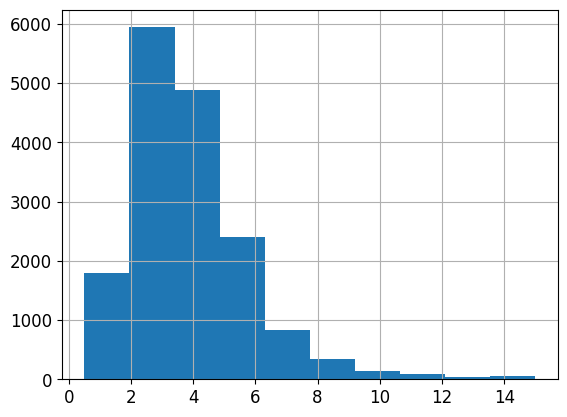

In [ ]:
housing["median_income"].hist()

In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [ ]:
housing["income_cat"].value_counts()

income_cat
3    5789
2    5265
4    2911
5    1890
1     657
Name: count, dtype: int64

<Axes: >

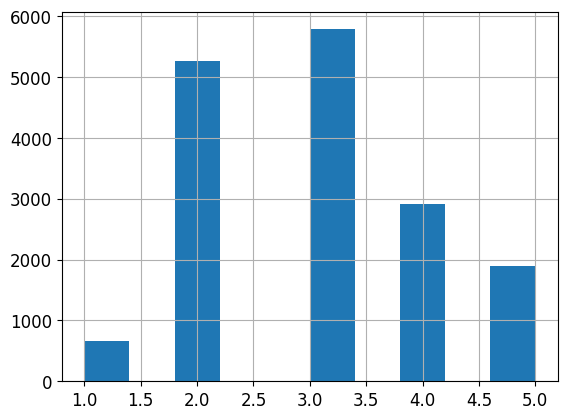

In [ ]:
housing["income_cat"].hist()

계층 샘플링

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

KeyError: '[16060, 17, 6187, 16092, 3729, 1419, 11672, 13894, 10769, 9769, 4544, 10569, 8074, 5593, 4038, 1838, 13606, 4457, 5376, 13661, 2194, 13524, 4141, 8606, 6188, 5550, 1765, 11649, 12311, 12259, 11312, 8002, 15952, 12033, 15169, 16066, 5358, 6599, 12160, 10458, 16403, 12117, 9019, 2709, 9896, 116, 5397, 3092, 12665, 2130, 10767, 3509, 7176, 15741, 10582, 15491, 8573, 10871, 11265, 5988, 4881, 14704, 11425, 16182, 10267, 13837, 9802, 9823, 5617, 10674, 13097, 11423, 5094, 5784, 6928, 9908, 10834, 15190, 8516, 1662, 15443, 7683, 2569, 998, 11977, 11880, 10555, 14612, 8111, 7623, 8518, 3091, 2518, 13580, 263, 13289, 6775, 970, 761, 6619, 4262, 5985, 2349, 11670, 7516, 8789, 9282, 7468, 3518, 12432, 15684, 11603, 9920, 5072, 7342, 7094, 15030, 5591, 9349, 4396, 7100, 7326, 13436, 4144, 8931, 8993, 7916, 10486, 1636, 10336, 7207, 470, 3859, 11523, 2484, 11972, 3952, 2843, 8494, 1766, 9574, 2890, 2834, 16290, 13692, 13234, 5568, 4280, 5899, 14830, 9406, 14425, 3189, 918, 674, 4105, 9101, 13991, 16253, 12745, 14490, 6826, 7755, 16413, 10129, 11352, 6890, 7681, 6951, 16304, 6604, 12268, 9872, 6595, 11051, 2246, 5814, 6325, 13192, 5134, 7824, 517, 3719, 14261, 2053, 6373, 15156, 15677, 1702, 8602, 753, 9332, 3891, 6110, 7432, 12407, 16444, 6425, 9337, 11298, 10090, 3663, 4803, 4678, 5415, 8546, 1166, 8103, 6221, 6785, 4359, 12367, 8495, 3845, 10866, 8680, 971, 10902, 2471, 5800, 3328, 10201, 1549, 5819, 11397, 3843, 3936, 9934, 7994, 15752, 101, 7709, 13690, 1783, 1521, 2503, 16250, 15382, 3251, 5871, 10669, 7245, 13309, 16237, 12642, 951, 12448, 14547, 726, 13583, 15646, 8432, 610, 6901, 4728, 9849, 14515, 10030, 15529, 896, 14185, 16006, 14294, 12461, 2739, 750, 12769, 1503, 4939, 11685, 7012, 14189, 6483, 14394, 10541, 13, 1108, 15262, 4785, 8185, 10315, 2671, 11005, 11340, 3602, 4487, 5000, 15211, 2391, 7145, 9432, 13582, 1450, 14044, 14199, 4106, 6500, 1694, 5387, 11406, 12144, 16474, 11639, 10332, 5126, 1032, 443, 11599, 15763, 4843, 9886, 12697, 15182, 14354, 9360, 9283, 15556, 2386, 14957, 9528, 8264, 2789, 6289, 6997, 7555, 10146, 16371, 7958, 12455, 10382, 14481, 5761, 9713, 2975, 8621, 6701, 15785, 7394, 9758, 747, 2240, 11801, 8742, 8508, 12756, 7314, 15498, 3837, 15939, 968, 15671, 13541, 11286, 15433, 2487, 12374, 3587, 16383, 11240, 6156, 5671, 491, 10404, 1924, 5065, 8130, 3866, 5888, 8658, 2263, 14596, 936, 14422, 14972, 3190, 15015, 11045, 14281, 1084, 10473, 16140, 3529, 5187, 3591, 1941, 11098, 5611, 15098, 1910, 10099, 15863, 6341, 14338, 75, 16276, 758, 10380, 2544, 14265, 8272, 8210, 3628, 16323, 12820, 8781, 13557, 13227, 3359, 12388, 15379, 4564, 10967, 10584, 6447, 6420, 7593, 13636, 3561, 7736, 10998, 9079, 10742, 12047, 396, 15570, 12042, 16258, 5136, 14811, 12896, 11208, 4641, 5078, 5225, 466, 15713, 10125, 1295, 6178, 10010, 15608, 11190, 804, 2077, 333, 7312, 9781, 248, 13555, 13586, 8923, 12825, 13493, 15688, 1952, 9680, 6360, 14992, 9743, 12638, 4655, 2261, 3252, 7292, 15909, 6863, 11485, 16212, 1072, 8345, 2530, 10995, 13959, 6124, 619, 11179, 2865, 15, 11154, 10927, 14047, 5878, 9233, 4148, 704, 15264, 13343, 8033, 10216, 9735, 7568, 8114, 1279, 4439, 2014, 9648, 7806, 10469, 10909, 5212, 12224, 5261, 8098, 16459, 8280, 1304, 1180, 13597, 16265, 11728, 11319, 10533, 16302, 3513, 15243, 126, 3933, 13829, 4427, 3685, 5379, 12596, 14564, 12726, 2468, 13960, 10452, 7543, 10970, 14550, 9836, 8847, 7457, 9188, 4599, 11736, 14924, 11651, 2597, 37, 4588, 8846, 15748, 16054, 9663, 14782, 6945, 14733, 11930, 11721, 14685, 7960, 8076, 1034, 16127, 14671, 15200, 8038, 12456, 12994, 1110, 10105, 14655, 2584, 15224, 13696, 15183, 13243, 4569, 4191, 6022, 3822, 13087, 10314, 6321, 3730, 11966, 8016, 8645, 14529, 14566, 11571, 2552, 11301, 2893, 9021, 928, 9618, 12213, 6302, 14284, 14479, 11333, 5961, 11695, 1418, 12941, 15331, 6043, 11753, 6159, 5879, 5062, 11178, 8316, 3173, 2511, 5812, 6412, 3433, 8574, 15795, 3921, 1739, 7658, 9685, 2147, 15279, 13432, 10108, 13587, 6502, 4962, 6824, 3846, 15125, 14628, 4067, 731, 1010, 12968, 1819, 3175, 2342, 3072, 10593, 280, 1668, 9847, 8919, 10024, 946, 2447, 12544, 10191, 8551, 10238, 12810, 6995, 16009, 11195, 16048, 13107, 5152, 4532, 10468, 13081, 5547, 159, 7198, 732, 13502, 799, 4871, 6669, 2855, 14331, 9001, 11247, 12848, 12310, 12555, 8365, 3589, 12302, 13116, 9878, 3995, 11807, 10278, 3294, 12204, 3152, 12958, 8616, 6310, 4614, 13198, 13981, 3056, 11944, 3911, 5160, 15007, 11354, 4199, 14010, 4103, 15281, 12536, 13009, 1048, 157, 318, 14348, 2186, 11316, 12721, 4642, 4513, 3275, 4146, 15086, 3899, 9489, 2925, 14959, 12003, 13975, 4596, 9218, 16307, 13674, 13285, 8125, 1164, 15770, 5928, 9284, 1263, 12800, 9677, 4953, 11003, 11272, 11438, 12384, 14668, 5705, 2591, 2743, 3138, 7275, 2152, 3009, 4309, 1025, 15392, 13125, 13164, 10518, 1239, 6058, 4149, 5950, 2540, 14289, 10008, 13794, 4657, 4498, 16377, 4520, 900, 728, 15070, 5239, 8402, 16301, 10005, 6113, 247, 3925, 8496, 9300, 10490, 1011, 10021, 8201, 7608, 6478, 375, 10226, 1398, 13978, 7390, 10534, 7598, 10821, 54, 4233, 11108, 4104, 4366, 9428, 11483, 2433, 12496, 9989, 8507, 6721, 15123, 2379, 3325, 12763, 14701, 3208, 5859, 7235, 14841, 12599, 14498, 1352, 207, 10310, 3780, 12485, 6347, 92, 15303, 7282, 4404, 4367, 12205, 3074, 7093, 6748, 13404, 10153, 1498, 4131, 6591, 6494, 3554, 7340, 6136, 1926, 10100, 4722, 15663, 6845, 16487, 3398, 14401, 10989, 13729, 10383, 15328, 2097, 11621, 1935, 8230, 12055, 5481, 2851, 2870, 3257, 4964, 10086, 5123, 1630, 4935, 1018, 3232, 9064, 6172, 5210, 4854, 2347, 8217, 73, 3178, 3464, 4030, 9260, 12766, 11642, 14252, 2005, 12010, 5992, 3507, 6854, 5826, 13927, 14755, 9508, 2428, 3653, 9914, 2614, 2751, 2966, 11373, 1706, 8628, 6961, 15458, 3588, 5285, 5011, 7999, 4905, 15643, 10199, 4687, 4844, 7440, 11353, 12222, 1901, 7982, 14312, 2523, 3403, 9612, 575, 5108, 6517, 14793, 14887, 3900, 653, 10840, 8019, 12537, 8859, 13842, 14353, 10692, 9768, 15490, 7640, 11643, 16111, 15047, 14485, 13754, 14697, 8109, 16178, 7073, 10428, 14218, 11458, 3209, 14417, 2281, 13734, 8376, 13561, 765, 1796, 7355, 502, 8509, 891, 10416, 2554, 15031, 8759, 7497, 6160, 6018, 14449, 14765, 15634, 12678, 13260, 8101, 11564, 16380, 13449, 15879, 8031, 14035, 8243, 13494, 684, 4858, 4263, 12623, 2619, 9539, 8854, 11924, 12255, 5506, 8768, 3484, 15868, 12017, 9686, 15865, 5287, 1750, 4944, 9846, 10839, 4505, 14336, 11166, 16073, 13735, 4376, 2635, 4286, 576, 9385, 1316, 10786, 11536, 12019, 2586, 9395, 343, 2168, 7944, 10270, 14943, 10245, 15215, 3270, 6294, 1940, 10046, 10528, 10879, 2283, 3701, 10542, 2146, 1253, 12797, 4779, 9845, 10737, 10600, 465, 5350, 15970, 4750, 2779, 10798, 8136, 12249, 8835, 13832, 13655, 8607, 8168, 6779, 14110, 8399, 15772, 2475, 13163, 3212, 3753, 12802, 10220, 5077, 4818, 2110, 7157, 7489, 9517, 735, 4100, 4501, 13008, 4083, 10368, 4504, 12953, 3715, 12813, 7050, 3340, 6196, 10702, 3115, 10377, 7114, 10285, 8304, 905, 11310, 1421, 15722, 86, 3755, 3614, 12424, 7513, 10489, 16148, 10097, 13564, 7984, 12089, 7317, 10347, 16214, 13528, 7348, 3912, 12867, 12320, 5583, 2839, 3906, 13531, 11724, 7810, 12333, 6488, 7357, 11186, 8204, 6231, 9419, 11591, 15473, 10149, 3411, 4686, 6472, 2049, 8465, 13684, 7276, 8782, 5628, 4960, 11039, 8418, 9765, 10578, 11007, 832, 1839, 8644, 5559, 9325, 14020, 4644, 3877, 7494, 1744, 5230, 3414, 1983, 13383, 9764, 10671, 15950, 9320, 15666, 8077, 13390, 4168, 9075, 15692, 6760, 13751, 1657, 13705, 5913, 10444, 6690, 12008, 6693, 6746, 3519, 8143, 12964, 12296, 14061, 3861, 2509, 12206, 5876, 2373, 10717, 16423, 12951, 16336, 15659, 8086, 9562, 7794, 8979, 3655, 16420, 530, 10662, 5385, 1644, 9306, 185, 3324, 497, 8734, 638, 9494, 8359, 15194, 14201, 6450, 1041, 8620, 2461, 7897, 2443, 10118, 15209, 4264, 16442, 16263, 11136, 1528, 5451, 15821, 5499, 11289, 4135, 5496, 1730, 9883, 5117, 283, 3381, 9399, 1197, 6691, 7240, 3229, 1320, 1341, 14389, 9305, 5340, 2735, 8722, 15368, 4042, 13954, 8532, 15864, 15590, 8858, 3904, 1538, 6589, 15489, 14188, 7428, 14627, 13506, 14884, 3118, 6907, 13228, 8646, 7241, 3314, 5040, 6038, 7205, 14370, 12837, 7089, 11766, 6605, 1256, 15675, 3619, 13219, 14649, 4682, 12401, 943, 6365, 11047, 12338, 7646, 13501, 4870, 5764, 9933, 11088, 11679, 12137, 13787, 7998, 7521, 1207, 3158, 14209, 14384, 15854, 13932, 1736, 14521, 4851, 33, 15237, 10526, 6687, 16415, 8354, 1947, 12510, 11137, 16134, 1811, 16145, 9353, 12634, 4452, 1218, 9024, 11037, 316, 7898, 546, 13647, 14961, 1482, 14307, 3893, 5803, 13786, 16065, 11554, 15911, 5841, 6303, 143, 9995, 3603, 9147, 1972, 11821, 14140, 7458, 3907, 14711, 6758, 10039, 5296, 10507, 16238, 15288, 1134, 1837, 14122, 4977, 2541, 10066, 6277, 3560, 11508, 10331, 3658, 15191, 6073, 16208, 7465, 13749, 534, 14506, 14455, 3897, 14345, 1635, 9231, 14756, 13507, 14155, 9784, 5807, 1007, 4951, 8710, 13774, 4955, 16230, 9756, 11909, 913, 13111, 10072, 480, 11637, 13875, 7006, 12704, 1159, 11836, 1327, 8367, 9293, 13905, 5175, 1044, 5793, 9714, 14027, 3768, 13353, 12698, 397, 5916, 10421, 5178, 9358, 14592, 3772, 16023, 16195, 3721, 2510, 8678, 14296, 4300, 12174, 1982, 6838, 11044, 14363, 8265, 5395, 3536, 15899, 5091, 4248, 2446, 4989, 14625, 5454, 2225, 6749, 8821, 2605, 10714, 13395, 2463, 11466, 2028, 9247, 1012, 11142, 11075, 10073, 5217, 10450, 9425, 13707, 10442, 9546, 79, 14555, 13877, 7324, 3949, 8060, 10581, 12841, 4767, 6095, 6300, 3840, 12846, 8670, 13952, 9744, 12467, 9763, 15394, 12734, 4618, 4660, 9089, 4252, 854, 2513, 2770, 5585, 8977, 13079, 2933, 6849, 5734, 650, 8587, 6186, 1833, 7500, 3120, 4392, 707, 7038, 3696, 7129, 16112, 3815, 1021, 1637, 8311, 9471, 12261, 6371, 2876, 6862, 7142, 2607, 14388, 3335, 6465, 867, 15399, 16074, 5986, 5728, 14635, 4351, 3114, 13539, 14937, 6479, 10651, 3520, 4240, 4197, 4243, 4882, 10951, 3428, 3676, 11291, 9721, 14052, 976, 14511, 9273, 4285, 7485, 641, 6219, 14304, 11895, 11797, 13504, 2494, 12578, 4302, 15332, 301, 3492, 2134, 3260, 11915, 1704, 125, 13026, 9468, 15958, 8774, 14179, 7381, 2699, 6909, 15647, 5248, 16155, 2787, 12379, 3692, 3084, 15519, 4921, 15482, 13145, 10396, 5809, 8146, 4590, 10320, 2327, 3462, 114, 6941, 11311, 16029, 10300, 12170, 4503, 7032, 12600, 4776, 792, 1361, 4570, 1275, 3812, 8080, 14705, 8684, 3075, 16295, 1539, 3183, 7303, 4514, 7880, 6349, 12371, 15652, 12565, 1061, 13223, 11346, 532, 4933, 5818, 12682, 3240, 7825, 14, 2321, 8688, 6914, 756, 5556, 9746, 3950, 62, 10627, 5936, 1026, 12363, 11782, 7928, 10623, 1643, 6933, 3323, 310, 7022, 12359, 12318, 8442, 2106, 11287, 1037, 3011, 12373, 15843, 13402, 4173, 15241, 2252, 11096, 3620, 3082, 12701, 7310, 1469, 10963, 10977, 8429, 8219, 13988, 13509, 7147, 6048, 2291, 334, 5380, 3210, 3521, 6184, 7519, 5096, 13945, 10119, 9634, 2297, 13683, 3726, 7852, 15162, 6810, 6965, 4369, 14068, 8385, 14808, 16030, 2204, 13039, 3502, 9216, 652, 10800, 11174, 12218, 7419, 10720, 10884, 5005, 399, 9004, 13584, 8389, 6646, 14846, 235, 2166, 3238, 518, 12271, 3581, 15226, 9157, 8526, 15232, 4303, 13916, 6942, 1541, 8142, 15943, 2526, 5371, 8510, 11113, 5791, 15064, 6553, 14405, 10655, 7796, 10498, 662, 886, 1593, 10852, 9279, 12795, 1168, 1494, 11988, 8957, 10094, 7894, 16299, 161, 4626, 3137, 11467, 2398, 15867, 14690, 14198, 15534, 13492, 10296, 15000, 1489, 5284, 12723, 1684, 7405, 13490, 14567, 12106, 8952, 12793, 4014, 10483, 12073, 8043, 1182, 7249, 984, 10330, 1302, 3748, 4491, 5933, 11978, 15329, 5180, 2125, 15797, 10561, 6162, 9641, 15650, 13332, 6398, 694, 4092, 11065, 13279, 11781, 4990, 12182, 13806, 15066, 14757, 14002, 8683, 8530, 14801, 14865, 1298, 9236, 10151, 4697, 4943, 13476, 1420, 12589, 2712, 8894, 13892, 10430, 374, 3198, 12594, 5620, 11093, 10697, 10434, 11888, 13380, 1005, 14437, 6983, 10557, 3409, 7648, 11115, 1556, 4033, 10815, 5059, 3360, 182, 3066, 7739, 4936, 7974, 3470, 7893, 12450, 15131, 5832, 6697, 6913, 10615, 15378, 10068, 8773, 10914, 14476, 10299, 16007, 9867, 13633, 9597, 8199, 4942, 8289, 1141, 1781, 9766, 15878, 8560, 4429, 14860, 14646, 14260, 4700, 13570, 16292, 9733, 14842, 6296, 13311, 5374, 10942, 5498, 11542, 7448, 5420, 6131, 15723, 7541, 6743, 6827, 7438, 6191, 5392, 1081, 15536, 960, 6343, 5566, 8180, 9703, 9684, 7192, 7800, 8823, 10019, 1787, 7815, 4539, 3816, 15203, 13917, 5428, 7781, 523, 1463, 4430, 4922, 13457, 15245, 1715, 2105, 6348, 16210, 4877, 14268, 435, 84, 1870, 14773, 12248, 11623, 12072, 10672, 6021, 11338, 15301, 2278, 227, 10161, 6322, 13951, 11717, 1155, 8757, 11300, 9014, 12824, 11222, 4929, 15825, 14066, 8163, 12895, 10885, 7190, 7043, 1829, 4991, 13510, 16179, 6794, 5372, 5304, 13889, 10620, 10391, 16076, 14412, 3882, 5898, 3967, 51, 9693, 12180, 448, 8765, 1724, 8239, 8540, 771, 13624, 7954, 10418, 10943, 6489, 9658, 12695, 12465, 7740, 2592, 801, 9094, 730, 9644, 12989, 12773, 4431, 14971, 15039, 8188, 12107, 4179, 8477, 2202, 10986, 14170, 1076, 8317, 9386, 14100, 10665, 9026, 12557, 5437, 9786, 15366, 3385, 7057, 12610, 12516, 4976, 1261, 10898, 6484, 5313, 136, 2318, 10881, 8904, 10254, 4550, 16387, 11894, 13906, 14590, 6315, 3947, 16100, 10579, 2339, 2609, 2213, 13466, 5473, 7439, 15274, 15453, 1452, 8072, 12416, 2445, 10011, 3727, 4081, 14488, 7601, 13036, 1000, 8985, 12509, 9053, 12111, 6679, 23, 12844, 16498, 409, 12152, 6902, 9521, 16316, 5241, 8793, 13804, 13716, 2817, 7510, 1045, 3622, 7269, 11097, 1224, 11449, 7479, 9525, 11175, 2745, 11196, 6054, 4699, 11156, 993, 12945, 11121, 3767, 1228, 15038, 8593, 2565, 1980, 6313, 39, 8348, 2539, 2093, 4169, 12574, 15828, 10341, 9445, 8262, 12337, 15075, 2024, 6180, 9000, 5966, 10831, 5502, 13366, 8790, 5983, 8489, 6417, 9437, 8254, 6946, 12045, 10818, 3160, 8451, 4994, 14692, 15091, 8107, 5924, 6211, 5462, 6960, 10621, 10778, 5867, 9946, 3126, 2979, 11422, 953, 7745, 9206, 12351, 10682, 2199, 2935, 2449, 15201, 11419, 1158, 2784, 2491, 13640, 2633, 455, 8014, 10990, 10929, 5238, 7579, 16149, 9773, 11413, 8275, 12105, 6281, 2249, 11570, 9585, 4733, 15657, 1960, 5700, 13229, 628, 5600, 10530, 14495, 3375, 9880, 8012, 15780, 2740, 8041, 6527, 5035, 7662, 4249, 13943, 7664, 16016, 2262, 5750, 2620, 15071, 1428, 12101, 9876, 13177, 287, 4091, 9997, 14560, 14328, 9605, 16097, 14462, 5321, 96, 9930, 2697, 9598, 12149, 2083, 13471, 11739, 3165, 645, 11155, 7850, 14787, 7799, 5355, 6894, 1994, 14377, 6683, 4443, 4283, 7626, 7409, 2974, 8089, 3018, 3740, 7529, 22, 5488, 3747, 4229, 9239, 4228, 8502, 9996, 8569, 8785, 12737, 2753, 14679, 7156, 4119, 11876, 4426, 8285, 4757, 1923, 1978, 13779, 10184, 11332, 5614, 9516, 12376, 8884, 6312, 10180, 9013, 1802, 12036, 3142, 15656, 2264, 13657, 3485, 11006, 10590, 3330, 14158, 8598, 9375, 12717, 15310, 9650, 2325, 5504, 7236, 11507, 7750, 3476, 6755, 1721, 9022, 8715, 11139, 11342, 11640, 5858, 15769, 6964, 15919, 15662, 6331, 13929, 16017, 12999, 306, 11049, 3180, 14867, 781, 9191, 11426, 12650, 11859, 10001, 13841, 26, 11145, 3668, 8067, 5680, 8208, 7622, 12673, 10527, 4181, 8610, 8220, 4166, 15406, 851, 1121, 9637, 4948, 4118, 11106, 6603, 174, 720, 367, 9619, 14954, 10730, 15218, 2829, 7161, 2682, 7812, 10256, 14239, 8319, 6702, 817, 2928, 1502, 2286, 2492, 13431, 1476, 7431, 5787, 5389, 6745, 12713, 286, 15478, 3640, 13825, 6459, 6355, 8949, 15552, 8561, 16294, 12209, 13294, 7180, 3291, 6493, 13270, 14629, 12652, 6400, 6596, 1705, 5677, 11147, 1773, 11624, 5353, 9025, 4841, 7238, 4122, 16458, 13985, 7889, 6772, 15881, 3097, 1647, 4310, 10806, 5754, 512, 5388, 6796, 2940, 4113, 14190, 14472, 1596, 9262, 14057, 16310, 8708, 15067, 5140, 3067, 6770, 3040, 1719, 3965, 11676, 1580, 2860, 8736, 15833, 11539, 3844, 16450, 10223, 5909, 16239, 11238, 4788, 2292, 4931, 7273, 11042, 7584, 8164, 12833, 8591, 1656, 13928, 9504, 16407, 11567, 14553, 4253, 16236, 11755, 13061, 9923, 4773, 4178, 9220, 4157, 11663, 14575, 8454, 15354, 9459, 3265, 167, 15755, 11940, 4117, 603, 6098, 16013, 10625, 7532, 13497, 6260, 16332, 3219, 8538, 7452, 14850, 13122, 3193, 13082, 5838, 9782, 4001, 13851, 1688, 15642, 14181, 8027, 15764, 5336, 4878, 1193, 4299, 6888, 14524, 14975, 1619, 13417, 14404, 543, 1122, 9885, 10670, 3417, 12666, 4402, 12199, 5892, 13382, 500, 2258, 5636, 1101, 14989, 7673, 1145, 10109, 5276, 1075, 14778, 5139, 15908, 10829, 14120, 2848, 13394, 7656, 5475, 8913, 5039, 15140, 1673, 7470, 8069, 9973, 15526, 14274, 12184, 11531, 8654, 6026, 387, 3055, 7760, 13581, 10641, 9532, 5464, 4380, 4267, 9542, 1091, 11053, 2363, 10064, 13160, 13062, 657, 6815, 15933, 13802, 4968, 15801, 7415, 2089, 4046, 15046, 16456, 6261, 9472, 14099, 9515, 10217, 12185, 9372, 9659, 13853, 941, 2884, 4652, 6077, 3200, 7264, 10492, 5984, 9806, 8034, 4796, 14217, 11758, 3697, 8520, 11086, 12677, 14978, 13023, 9526, 13142, 1996, 2549, 1653] not in index'

In [ ]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

# 포함된 비율

KeyError: 'income_cat'

In [ ]:
housing["income_cat"].value_counts() / len(housing)

# 전체 세트에 포함되어 있는 비율만큼, 훈련-테스트셋도 거의 비슷한 비율로 포함되어 있음
# 뭐가? 타겟 레이블 예측에 중요한 속성이라고 했던 '중간 소득'이!! (income_cat으로 카테고리화 해줌)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

계층적 샘플링 train_test_split에서 더 쉽게 하는 방법

In [ ]:
st_train_set, st_test_set = train_test_split(housing, test_size = 0.2, random_state = 42, stratify = housing["income_cat"])
# stratify = housing["income_cat"]
# 인자로 추가 하나만 해주면 됨! 원하는 속성을 넣어주면 되는거

In [ ]:
st_train_set["income_cat"].value_counts() / len(st_train_set)

# 그렇게 해도 위 방식과 거의 유사하게 나오는 것을 알 수가 있다.

income_cat
3    0.350594
2    0.318873
4    0.176319
5    0.114467
1    0.039746
Name: count, dtype: float64

결론은 그대로 train_test_split 함수 쓰되, 앞으로는 데이터 전처리에서 계층적 샘플링 인자를 추가하는 것도 함께 고려하자

In [ ]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

KeyError: 'income_cat'

In [ ]:
compare_props

Overall  Stratified    Random  Rand. %error  Strat. %error
income_cat                                                             
1           0.039826    0.039971  0.040213      0.973236       0.364964
2           0.318847    0.318798  0.324370      1.732260      -0.015195
3           0.350581    0.350533  0.358527      2.266446      -0.013820
4           0.176308    0.176357  0.167393     -5.056334       0.027480
5           0.114438    0.114341  0.109496     -4.318374      -0.084674

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

KeyError: "['income_cat'] not found in axis"

와 심지어 이렇게 계층적 샘플링으로만 사용하고 이 특성은 다시 삭제함.
하긴 그렇지 그 후에 더 이상 이 카테고리는 쓸 일이 없는거니까.

# 데이터 이해를 위한 탐색과 시각화

In [ ]:
housing = strat_train_set.copy()

## 지리적 데이터 시각화

그림 저장: bad_visualization_plot


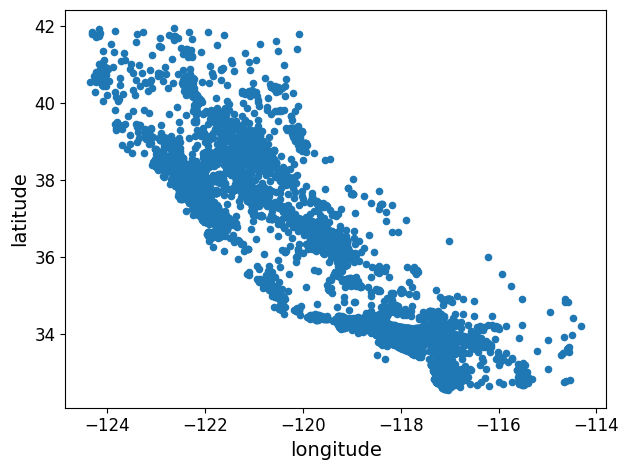

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude")
# 다른 버전
# housing.plot.scatter(x="longitude", y = "latitude")
# plt.scatter(housing["longitude"], y=["latitude"])

save_fig("bad_visualization_plot")


그림 저장: better_visualization_plot


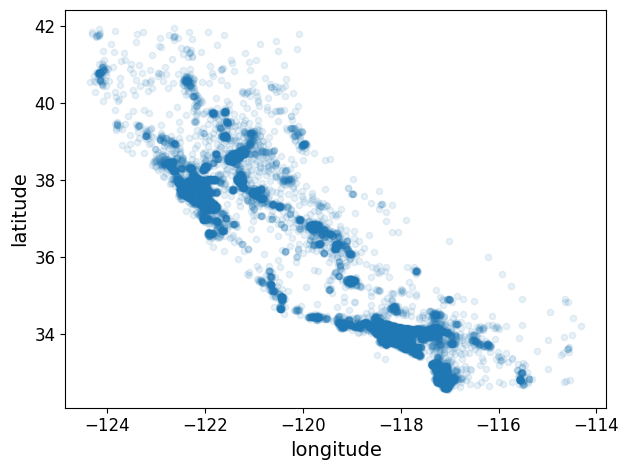

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
# alpha -> 투명도를 생성
# 밀집된 지역을 잘파악하기에 더 용이
save_fig("better_visualization_plot")

`sharex=False` 매개변수는 x-축의 값과 범례를 표시하지 못하는 버그를 수정합니다. 이는 임시 방편입니다(https://github.com/pandas-dev/pandas/issues/10611 참조). 수정 사항을 알려준 Wilmer Arellano에게 감사합니다.

그림 저장: housing_prices_scatterplot


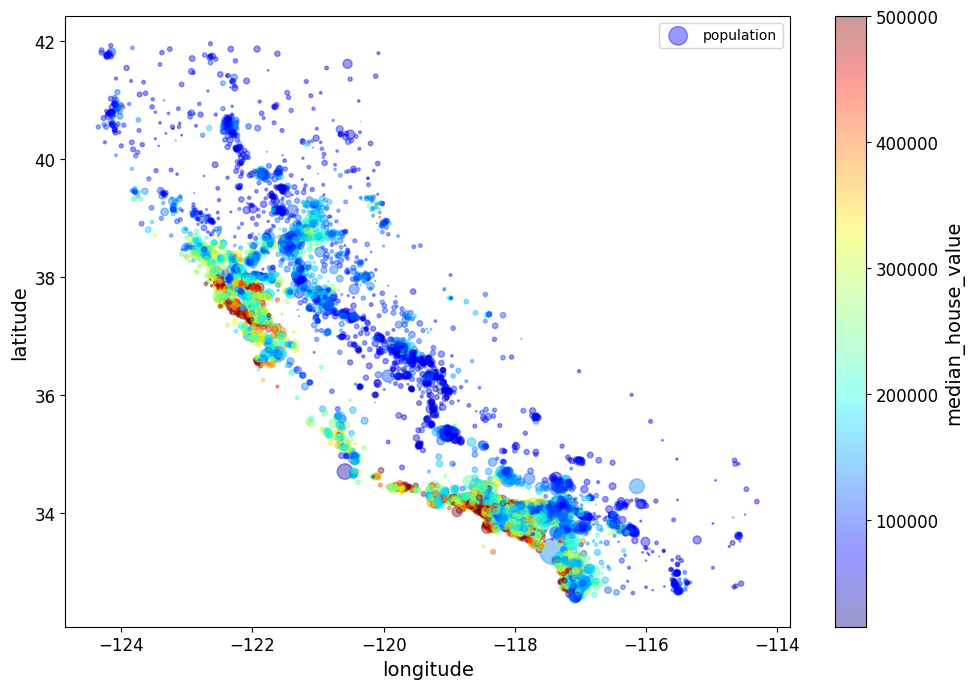

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

In [ ]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x7a02f4411e40>)

그림 저장: california_housing_prices_plot


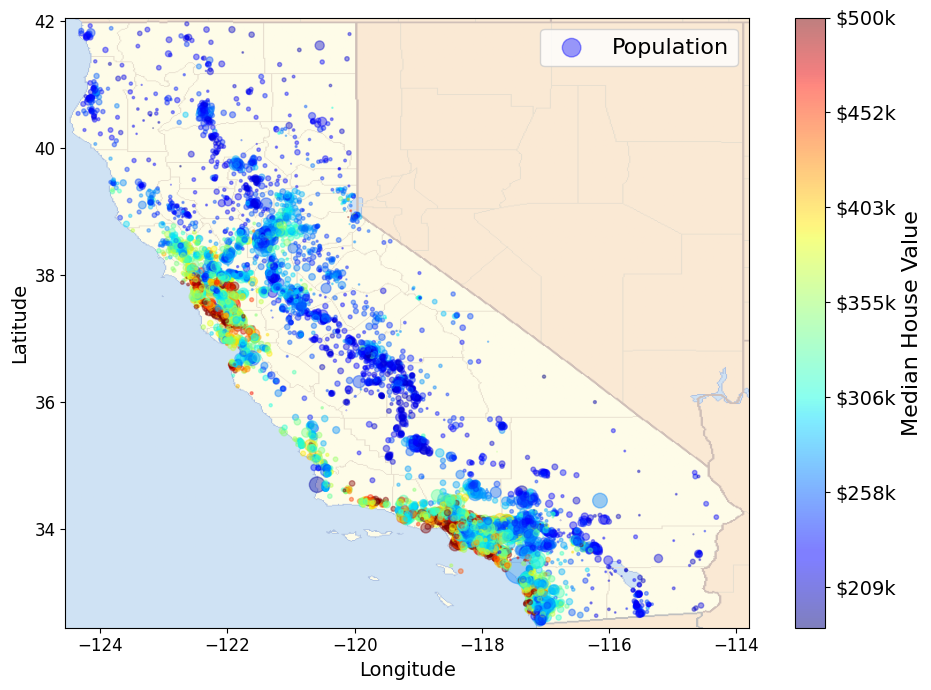

In [ ]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

## 상관관계 조사

In [ ]:
# corr_matrix = housing.corr()

# 교안 코드가 안돌아감..
# 판다스의 corr()함수는 정수형 데이터타입의 컬럼간 연산 만이 가능함
# 허나 'ocean_proximity'라는 컬럼에 'INLAND'와 같은 문자형이 포함되어 있어서 계산이 불가함

corr_matrix = housing.select_dtypes(include=np.number).corr()

우리의 목표는 타깃 레이블인 'median_house_value'을 잘예측하는 것
- corr()을 찍어봤으면
- 그 중 median_house_value와 상관관계가 높은 순부터 나열해보고 파악!
- 역시나 median_income이 제일 높음

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

피어슨의 상관 계수(위키백과):
![Pearson correlation coefficient](https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg)

상관관계 히트맵 (내가 추가)

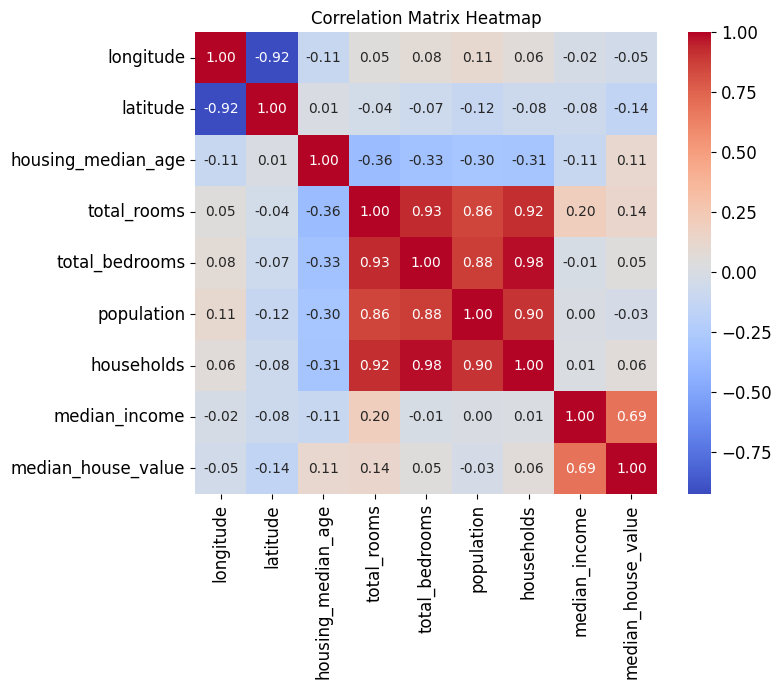

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

위 히트맵과 그 전에 나열된 상관계수 표를 토대로,
우리의 목표인 "median_house_value"와 상관관계가 그나마 높아보이는 건(빨간색인 것) 아래와 같다고 분석할 수 있음
- median_income
- total_rooms
- housing_median_age

그림 저장: scatter_matrix_plot


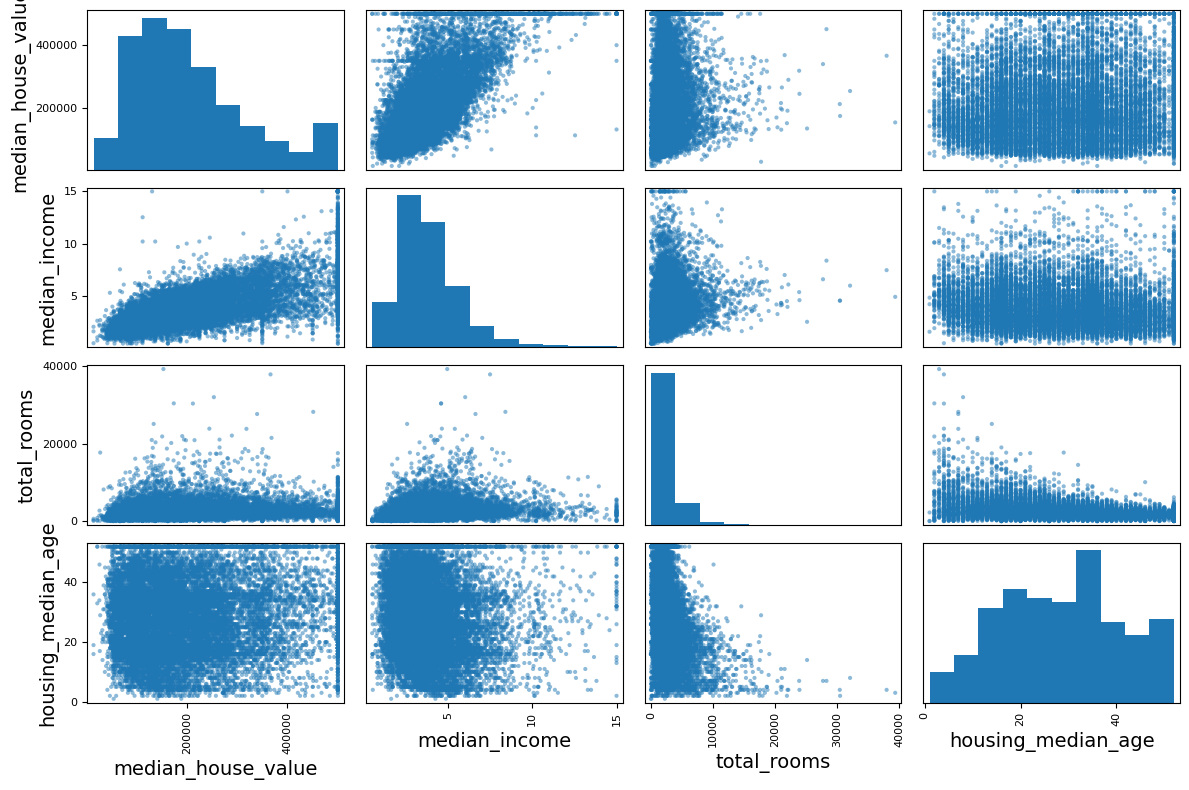

In [ ]:
# from pandas.tools.plotting import scatter_matrix # 옛날 버전의 판다스에서는
# 연관이 있는 특성들끼리 모아서 산점도 행렬(scattr_matrix)을 찍어보자

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

자기 자신 속성과의 관계는 당연히 산점도를 찍을 수 없기에 히스토그램으로 표현되는 것을 알 수 있음

`median_income`이 증가함에 따라 타깃 레이블인 `median_house_value`도 증가하는 우상향 형태를 볼 수 있다.

아래에서 이를 더 자세히 들여다보자.

그림 저장: income_vs_house_value_scatterplot


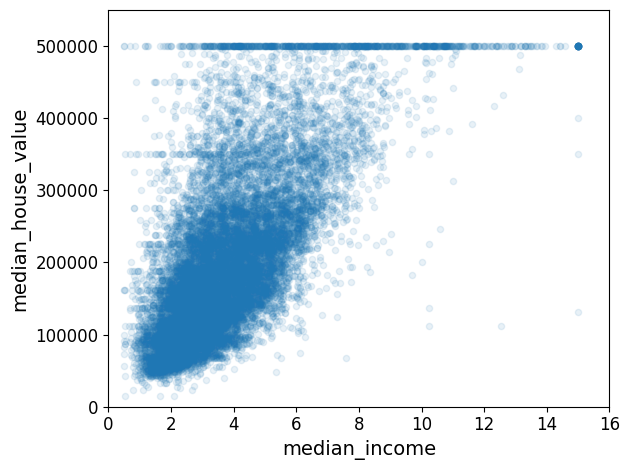

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000]) # 범위 제한
save_fig("income_vs_house_value_scatterplot")

## 특성 조합으로 실험

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"] # 그 지역의 방이 몇개인지 보다는 < 주택마다 방이 몇개인가가 더 유효
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"] # 그 지역의 침대가 몇개인지 보다는 < 방마다 침대가 몇개인가가 더 유효
housing["population_per_household"]=housing["population"]/housing["households"] # 그 지역의 인구 보다는 < 가구 당 인구가 더 유효

# 이렇게 특성 간 조합을 통해 더 예측에 유리한 특성을 '조합'할 줄 아는 사고가 틔여야 한다!!

In [ ]:
corr_matrix = housing.select_dtypes(include=np.number).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

- 조합한 rooms_per_household가 꽤 높게 나오는 것 확인
- bedrooms_per_room도 음수긴 하지만 절댓값이 높게 나옴


(주의!: 상관관계에서는 양수냐 음수냐보다도 절댓값이 높은 특성이 더 예측에 유효하게 사용될 수 있으니 주의해야 한다!)

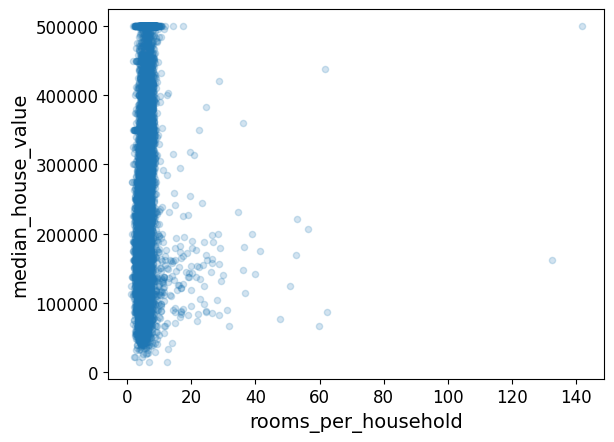

In [ ]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.show()

아아아아주 살짝 우상향 형태긴 함;;

In [ ]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  16512.000000  16512.000000        16512.000000  16512.000000   
mean    -119.575635     35.639314           28.653404   2622.539789   
std        2.001828      2.137963           12.574819   2138.417080   
min     -124.350000     32.540000            1.000000      6.000000   
25%     -121.800000     33.940000           18.000000   1443.000000   
50%     -118.510000     34.260000           29.000000   2119.000000   
75%     -118.010000     37.720000           37.000000   3141.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    16354.000000  16512.000000  16512.000000   16512.000000   
mean       534.914639   1419.687379    497.011810       3.875884   
std        412.665649   1115.663036    375.696156       1.904931   
min          2.000000      3.000000      2.000000       0.499900   
25%        295.000000    784.000000    279.000000       2.566950   
50%        433.000000   1164.000000    408.000000       3.541550   
75%        644.000000   1719.000000    602.000000       4.745325   
max       6210.000000  35682.000000   5358.000000      15.000100   

       median_house_value  rooms_per_household  bedrooms_per_room  \
count        16512.000000         16512.000000       16354.000000   
mean        207005.322372             5.440406           0.212873   
std         115701.297250             2.611696           0.057378   
min          14999.000000             1.130435           0.100000   
25%         119800.000000             4.442168           0.175304   
50%         179500.000000             5.232342           0.203027   
75%         263900.000000             6.056361           0.239816   
max         500001.000000           141.909091           1.000000   

       population_per_household  
count              16512.000000  
mean                   3.096469  
std                   11.584825  
min                    0.692308  
25%                    2.431352  
50%                    2.817661  
75%                    3.281420  
max                 1243.333333

# 머신러닝 알고리즘을 위한 데이터 준비

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1) # 훈련 세트를 위해 레이블 삭제
housing_labels = strat_train_set["median_house_value"].copy()

## 데이터 정제

책에 소개된 세 개의 옵션은 다음과 같습니다:

```
housing.dropna(subset=["total_bedrooms"])    # 옵션 1
housing.drop("total_bedrooms", axis=1)       # 옵션 2
median = housing["total_bedrooms"].median()  # 옵션 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

각 옵션을 설명하기 위해 주택 데이터셋의 복사본을 만듭니다. 이 때 적어도 하나의 열이 비어 있는 행만 고릅니다. 이렇게 하면 각 옵션의 정확한 동작을 눈으로 쉽게 확인할 수 있습니다.

In [ ]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

In [ ]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # 옵션 1

In [ ]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # 옵션 2

In [ ]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # 옵션 3

In [ ]:
sample_incomplete_rows

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

중간값이 수치형 특성에서만 계산될 수 있기 때문에 텍스트 특성을 삭제합니다:

In [ ]:
housing_num = housing.drop("ocean_proximity", axis=1)
# 다른 방법: housing_num = housing.select_dtypes(include=[np.number])

In [ ]:
imputer.fit(housing_num)

In [ ]:
imputer.statistics_

각 특성의 중간 값이 수동으로 계산한 것과 같은지 확인해 보세요:

In [ ]:
housing_num.median().values

훈련 세트를 변환합니다:

In [ ]:
X = imputer.transform(housing_num)

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [ ]:
housing_tr.loc[sample_incomplete_rows.index.values]

In [ ]:
imputer.strategy

In [ ]:
housing_tr.head()

## 텍스트와 범주형 특성 다루기

이제 범주형 입력 특성인 `ocean_proximity`을 전처리합니다:

In [ ]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

In [ ]:
ordinal_encoder.categories_

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

`OneHotEncoder`는 기본적으로 희소 행렬을 반환합니다. 필요하면 `toarray()` 메서드를 사용해 밀집 배열로 변환할 수 있습니다:

In [ ]:
housing_cat_1hot.toarray()

또는 `OneHotEncoder`를 만들 때 `sparse=False`로 지정할 수 있습니다:

In [ ]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

In [ ]:
cat_encoder.categories_

## 나만의 변환기

추가 특성을 위해 사용자 정의 변환기를 만들어보죠:

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# 열 인덱스
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # *args 또는 **kargs 없음
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # 아무것도 하지 않습니다
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())

책에서는 간단하게 인덱스 (3, 4, 5, 6)을 하드코딩했지만 다음처럼 동적으로 처리하는 것이 더 좋습니다:

In [ ]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # 열 인덱스 구하기

또한 `housing_extra_attribs`는 넘파이 배열이기 때문에 열 이름이 없습니다(안타깝지만 사이킷런을 사용할 때 생기는 문제입니다). `DataFrame`으로 복원하려면 다음과 같이 할 수 있습니다:

In [ ]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

## 변환 파이프라인

수치형 특성을 전처리하기 위해 파이프라인을 만듭니다:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
housing_num_tr

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
housing_prepared

In [ ]:
housing_prepared.shape

다음은 (판다스 `DataFrame` 열의 일부를 선택하기 위해) `DataFrameSelector` 변환기와 `FeatureUnion`를 사용한 예전 방식입니다:

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# 수치형 열과 범주형 열을 선택하기 위한 클래스
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

하나의 큰 파이프라인에 이들을 모두 결합하여 수치형과 범주형 특성을 전처리합니다:

In [ ]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [ ]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [ ]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

`ColumnTransformer`의 결과와 동일합니다:

In [ ]:
np.allclose(housing_prepared, old_housing_prepared)

# 모델 선택과 훈련

## 훈련 세트에서 훈련하고 평가하기

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

In [ ]:
# 훈련 샘플 몇 개를 사용해 전체 파이프라인을 적용해 보겠습니다
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("예측:", lin_reg.predict(some_data_prepared))

실제 값과 비교합니다:

In [ ]:
print("레이블:", list(some_labels))

In [ ]:
some_data_prepared

In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions) # MSE를 먼저 sklearn기능으로 구해주고
lin_rmse = np.sqrt(lin_mse) #np.sqrt()로 제곱근 씌워주면 끝 = RMSE
lin_rmse

**노트**: 사이킷런 0.22 버전부터는 `squared=False` 매개변수로 `mean_squared_error()` 함수를 호출하면 RMSE를 바로 얻을 수 있습니다.

In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

## 교차 검증을 사용한 평가

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준 편차:", scores.std())

display_scores(tree_rmse_scores)

In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

**노트**: 사이킷런 0.22 버전에서 `n_estimators`의 기본값이 100으로 바뀌기 때문에 향후를 위해 `n_estimators=100`로 지정합니다(책에는 등장하지 않습니다).

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

In [ ]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

# 모델 세부 튜닝

## 그리드 탐색

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # 1번 dic) 12(=3×4)개의 하이퍼파라미터 조합을 시도
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},

    # 2번 dic) bootstrap(앙상블)은 False로 하고 6(=2×3)개의 조합을 시도
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42) # 모델 선택해주고~

# 다섯 개의 폴드로 훈련하면 총 (12+6)*5=90번의 훈련이 일어납니다.
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

최상의 파라미터 조합은 다음과 같습니다:

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

그리드서치에서 테스트한 하이퍼파라미터 조합의 점수를 확인합니다:

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
pd.DataFrame(grid_search.cv_results_)

## 랜덤 탐색

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

rnd_search.fit(housing_prepared, housing_labels)

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

## 최상의 모델과 오차 분석

In [1]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

NameError: name 'grid_search' is not defined

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # 예전 방식
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

## 테스트 세트로 시스템 평가하기

In [ ]:
final_model = grid_search.best_estimator_
# 그리드 탐색으로 세부 튜닝을 거친 모델이 최종 모델이 되었군요.

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test) # 파이프라인 이미 다 해놨죠? 3 이미 full_pipeline객에 훈련셋을 활용한 학습된 정보가 들어있는 상태, 테스트셋에 대한 학습까지 추가되면 안돼!! transform()만
final_predictions = final_model.predict(X_test_prepared) # 최종 예측값 생성

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

테스트 RMSE에 대한 95% 신뢰 구간을 계산할 수 있습니다:

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

다음과 같이 수동으로 계산할 수도 있습니다:

In [ ]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

또는 t-점수 대신 z-점수를 사용할 수도 있습니다:

In [ ]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

# 추가 내용

## 전처리와 예측을 포함한 전체 파이프라인

In [ ]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

## joblib를 사용한 모델 저장

In [ ]:
my_model = full_pipeline_with_predictor

In [ ]:
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

## `RandomizedSearchCV`를 위한 Scipy 분포 함수

In [ ]:
from scipy.stats import geom, expon
geom_distrib=geom(0.5).rvs(10000, random_state=42)
expon_distrib=expon(scale=1).rvs(10000, random_state=42)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()

# 연습문제 해답

## 1.

질문: 서포트 벡터 머신 회귀(`sklearn.svm.SVR`)를 `kernel=“linear”`(하이퍼파라미터 `C`를 바꿔가며)나 `kernel=“rbf”`(하이퍼파라미터 `C`와 `gamma`를 바꿔가며) 등의 다양한 하이퍼파라미터 설정으로 시도해보세요. 지금은 이 하이퍼파라미터가 무엇을 의미하는지 너무 신경 쓰지 마세요. 최상의 `SVR` 모델은 무엇인가요?

**경고**: 사용하는 하드웨어에 따라 다음 셀을 실행하는데 30분 또는 그 이상 걸릴 수 있습니다.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

최상 모델의 (5-폴드 교차 검증으로 평가한) 점수는 다음과 같습니다:

In [ ]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

`RandomForestRegressor`보다 훨씬 좋지 않네요. 최상의 하이퍼파라미터를 확인해 보겠습니다:

In [ ]:
grid_search.best_params_

선형 커널이 RBF 커널보다 성능이 나은 것 같습니다. `C`는 테스트한 것 중에 최대값이 선택되었습니다. 따라서 (작은 값들은 지우고) 더 큰 값의 `C`로 그리드서치를 다시 실행해 보아야 합니다. 아마도 더 큰 값의 `C`에서 성능이 높아질 것입니다.

## 2.

질문: `GridSearchCV`를 `RandomizedSearchCV`로 바꿔보세요.

**경고**: 사용하는 하드웨어에 따라 다음 셀을 실행하는데 45분 또는 그 이상 걸릴 수 있습니다.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# expon(), reciprocal()와 그외 다른 확률 분포 함수에 대해서는
# https://docs.scipy.org/doc/scipy/reference/stats.html를 참고하세요.

# 노트: kernel 매개변수가 "linear"일 때는 gamma가 무시됩니다.
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

최상 모델의 (5-폴드 교차 검증으로 평가한) 점수는 다음과 같습니다:

In [ ]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

이제 `RandomForestRegressor`의 성능에 훨씬 가까워졌습니다(하지만 아직 차이가 납니다). 최상의 하이퍼파라미터를 확인해 보겠습니다:

In [ ]:
rnd_search.best_params_

이번에는 RBF 커널에 대해 최적의 하이퍼파라미터 조합을 찾았습니다. 보통 랜덤서치가 같은 시간안에 그리드서치보다 더 좋은 하이퍼파라미터를 찾습니다.

여기서 사용된 `scale=1.0`인 지수 분포를 살펴보겠습니다. 일부 샘플은 1.0보다 아주 크거나 작습니다. 하지만 로그 분포를 보면 대부분의 값이 exp(-2)와 exp(+2), 즉 0.1과 7.4 사이에 집중되어 있음을 알 수 있습니다.

In [ ]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

`C`에 사용된 분포는 매우 다릅니다. 주어진 범위안에서 균등 분포로 샘플링됩니다. 그래서 오른쪽 로그 분포가 거의 일정하게 나타납니다. 이런 분포는 원하는 스케일이 정확이 무엇인지 모를 때 사용하면 좋습니다:

In [ ]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

`reciprocal()` 함수는 하이퍼파라미터의 스케일에 대해 전혀 감을 잡을 수 없을 때 사용합니다(오른쪽 그래프에서 볼 수 있듯이 주어진 범위안에서 모든 값이 균등합니다). 반면 지수 분포는 하이퍼파라미터의 스케일을 (어느정도) 알고 있을 때 사용하는 것이 좋습니다.

## 3.

질문: 가장 중요한 특성을 선택하는 변환기를 준비 파이프라인에 추가해보세요.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

노트: 이 특성 선택 클래스는 이미 어떤 식으로든 특성 중요도를 계산했다고 가정합니다(가령 `RandomForestRegressor`을 사용하여). `TopFeatureSelector`의 `fit()` 메서드에서 직접 계산할 수도 있지만 (캐싱을 사용하지 않을 경우) 그리드서치나 랜덤서치의 모든 하이퍼파라미터 조합에 대해 계산이 일어나기 때문에 매우 느려집니다.

선택할 특성의 개수를 지정합니다:

In [ ]:
k = 5

최상의 k개 특성의 인덱스를 확인해 보겠습니다:

In [ ]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

In [ ]:
np.array(attributes)[top_k_feature_indices]

최상의 k개 특성이 맞는지 다시 확인합니다:

In [ ]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

좋습니다. 이제 이전에 정의한 준비 파이프라인과 특성 선택기를 추가한 새로운 파이프라인을 만듭니다:

In [ ]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [ ]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

처음 3개 샘플의 특성을 확인해 보겠습니다:

In [ ]:
housing_prepared_top_k_features[0:3]

최상의 k개 특성이 맞는지 다시 확인합니다:

In [ ]:
housing_prepared[0:3, top_k_feature_indices]

성공입니다!  :)

## 4.

질문: 전체 데이터 준비 과정과 최종 예측을 하나의 파이프라인으로 만들어보세요.

In [ ]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [ ]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

몇 개의 샘플에 전체 파이프라인을 적용해 보겠습니다:

In [ ]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

전체 파이프라인이 잘 작동하는 것 같습니다. 물론 예측 성능이 아주 좋지는 않습니다. `SVR`보다 `RandomForestRegressor`가 더 나은 것 같습니다.

## 5.

질문: `GridSearchCV`를 사용해 준비 단계의 옵션을 자동으로 탐색해보세요.

**경고**: 사용하는 하드웨어에 따라 다음 셀을 실행하는데 45분 또는 그 이상 걸릴 수 있습니다.

**노트**: 아래 코드에서 훈련 도중 경고를 피하기 위해 `OneHotEncoder`의 `handle_unknown` 하이퍼파라미터를 `'ignore'`로 지정했습니다. 그렇지 않으면 `OneHotEncoder`는 기본적으로 `handle_unkown='error'`를 사용하기 때문에 데이터를 변활할 때 훈련할 때 없던 범주가 있으면 에러를 냅니다. 기본값을 사용하면 훈련 세트에 모든 카테고리가 들어 있지 않은 폴드를 평가할 때 `GridSearchCV`가 에러를 일으킵니다. `'ISLAND'` 범주에는 샘플이 하나이기 때문에 일어날 가능성이 높습니다. 일부 폴드에서는 테스트 세트 안에 포함될 수 있습니다. 따라서 이런 폴드는 `GridSearchCV`에서 무시하여 피하는 것이 좋습니다.

In [ ]:
full_pipeline.named_transformers_["cat"].handle_unknown = 'ignore'

param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing, housing_labels)

In [ ]:
grid_search_prep.best_params_

최상의 `Imputer` 정책은 `most_frequent`이고 거의 모든 특성이 유용합니다(16개 중 15개). 마지막 특성(`ISLAND`)은 잡음이 추가될 뿐입니다.

축하합니다! 이제 머신러닝에 대해 꽤 많은 것을 알게 되었습니다. :)